In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import nltk
import math
import pickle

from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [2]:
data_train = pd.read_csv("hotel_train.csv")

In [3]:
data_test = pd.read_csv("hotel_test.csv")

In [4]:
# making date as an Index
data_train.set_index('date',inplace=True)

data_test.set_index('date',inplace=True)

In [5]:
data_train.head()

,Date_Year_and_Week_Number,IsCanceled,year,week_of_year,IsCanceled_4WK_SMA
date,,,,,
2015-07-06,201527,41,2015,27,NaN
2015-07-13,201528,48,2015,28,NaN
2015-07-20,201529,87,2015,29,NaN
2015-07-27,201530,74,2015,30,62.5
2015-08-03,201531,101,2015,31,77.5


In [6]:
data_train.shape

(103, 5)

In [7]:
data_test.head()

,Date_Year_and_Week_Number,IsCanceled,year,week_of_year,IsCanceled_4WK_SMA
date,,,,,
2017-07-24,201730,157,2017,30,122.25
2017-07-31,201731,173,2017,31,130.75
2017-08-07,201732,140,2017,32,128.25
2017-08-14,201733,182,2017,33,163.00
2017-08-21,201734,143,2017,34,159.50


In [8]:
data_test.tail()

,Date_Year_and_Week_Number,IsCanceled,year,week_of_year,IsCanceled_4WK_SMA
date,,,,,
2017-01-30,20175,51,2017,5,86.25
2017-02-06,20176,91,2017,6,73.25
2017-02-13,20177,96,2017,7,72.25
2017-02-20,20178,128,2017,8,91.50
2017-02-27,20179,77,2017,9,98.00


In [9]:
data_test.shape

(12, 5)

## 1. Use pmdarima to train a model on the training data and select a model of best fit based on  the Bayesian information criterion (BIC). The lower the BIC, the better the fit. Make sure to identify an appropriate seasonal factor when configuring the model (Hint: Use the autocorrelation function to help you do this).

In [10]:
# fit model
model = ARIMA(data_train['IsCanceled']) #, order=(5,1,0))
model_fit = model.fit()

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels

## Optimization of ARIMA model with training data

In [11]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             IsCanceled   No. Observations:                  103
Model:                          ARIMA   Log Likelihood                -539.312
Date:                Tue, 31 May 2022   AIC                           1082.623
Time:                        15:34:58   BIC                           1087.893
Sample:                             0   HQIC                          1084.758
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.4951      4.679     20.196      0.000      85.325     103.666
sigma2      2067.1259    319.609      6.468      0.000    1440.703    2693.549
Ljung-Box (L1) (Q):                   1.33   Jarque-

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels

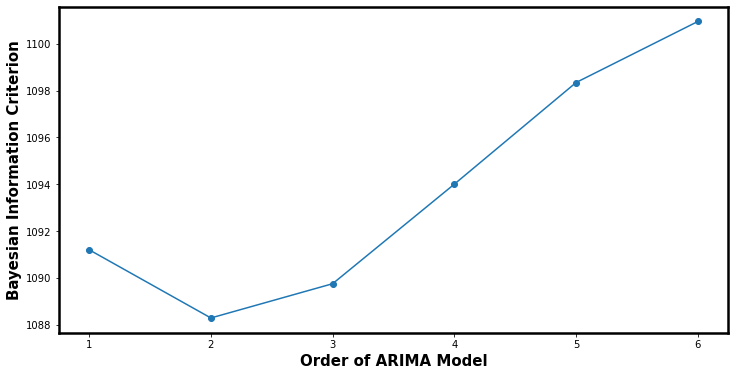

In [12]:
# Fit the data to an ARIMA(p,0,0) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(0,7):
    mod = ARIMA(data_train['IsCanceled'],order =(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
fig, ax = plt.subplots(figsize=(12, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)    
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of ARIMA Model',fontsize=15,fontweight='bold')
plt.ylabel('Bayesian Information Criterion',fontsize=15,fontweight='bold')
plt.show()

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels

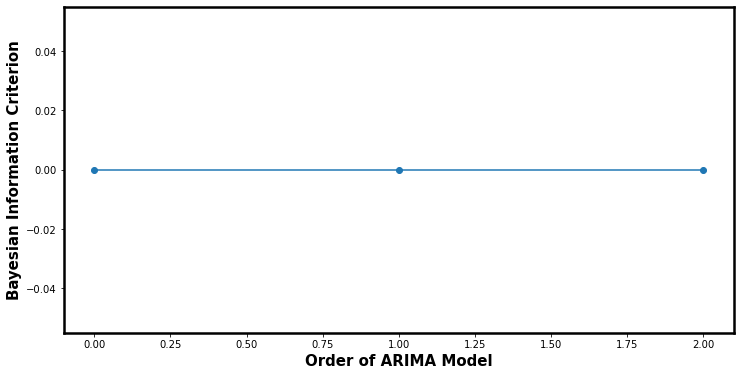

In [13]:
d_values = range(0, 3)

# Fit the data to an ARIMA(p,0,0) for p = 0,...,6 , and save the BIC
BIC_d = np.zeros(7)
for d in d_values:
    mod = ARIMA(data_train['IsCanceled'],order =(0,d,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC_d[p] = res.bic
    
# Plot the BIC as a function of p
fig, ax = plt.subplots(figsize=(12, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)    
plt.plot(range(0,3), BIC_d[0:3], marker='o')
plt.xlabel('Order of ARIMA Model',fontsize=15,fontweight='bold')
plt.ylabel('Bayesian Information Criterion',fontsize=15,fontweight='bold')
plt.show()

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels

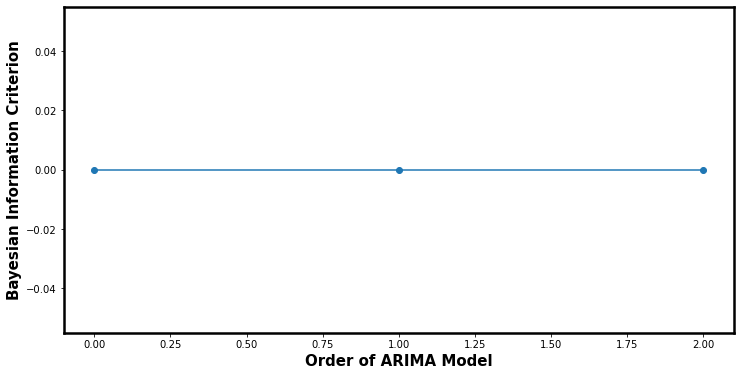

In [14]:
q_values = range(0, 3)

# Fit the data to an ARIMA(p,0,0) for p = 0,...,6 , and save the BIC
BIC_q = np.zeros(7)
for q in q_values:
    mod = ARIMA(data_train['IsCanceled'],order =(0,0,q))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC_q[p] = res.bic
    
# Plot the BIC as a function of p
fig, ax = plt.subplots(figsize=(12, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)    
plt.plot(range(0,3), BIC_q[0:3], marker='o')
plt.xlabel('Order of ARIMA Model',fontsize=15,fontweight='bold')
plt.ylabel('Bayesian Information Criterion',fontsize=15,fontweight='bold')
plt.show()

In [15]:
# fit model
model_op = ARIMA(data_train['IsCanceled'],order= (2,0,0)) #, order=(5,1,0))
model_op_fit = model_op.fit()

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels

In [16]:
# summary of optimized fit model
print(model_op_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             IsCanceled   No. Observations:                  103
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -534.875
Date:                Tue, 31 May 2022   AIC                           1077.750
Time:                        15:35:00   BIC                           1088.289
Sample:                             0   HQIC                          1082.019
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.9862      6.986     13.454      0.000      80.295     107.678
ar.L1          0.0823      0.106      0.775      0.438      -0.126       0.290
ar.L2          0.2701      0.101      2.675      0.0

## 2. Calculate the root mean squared error (RMSE) for the predictions versus the actual number of cancellations in the test set. Compare the RMSE value to the mean number of cancellations across the test set.

In [17]:
print(data_test.shape[0])

12


In [18]:
forecasts = model_op_fit.forecast(steps=data_test.shape[0])

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [19]:
forecasts

103    104.922934
104     81.112842
105     95.881516
106     90.664582
107     94.224913
108     93.108541
109     93.978465
110     93.748460
111     93.964534
112     93.920178
113     93.974898
114     93.967417
Name: predicted_mean, dtype: float64

In [20]:
print(type(forecasts))

<class 'pandas.core.series.Series'>


In [21]:
print(len(forecasts))

12


In [22]:
data_test['IsCanceled']

date
2017-07-24    157
2017-07-31    173
2017-08-07    140
2017-08-14    182
2017-08-21    143
2017-08-28    100
2017-01-23     51
2017-01-30     51
2017-02-06     91
2017-02-13     96
2017-02-20    128
2017-02-27     77
Name: IsCanceled, dtype: int64

In [23]:
test_data = data_test['IsCanceled'].to_numpy()

print(test_data)
print()
print(forecasts)

[157 173 140 182 143 100  51  51  91  96 128  77]

103    104.922934
104     81.112842
105     95.881516
106     90.664582
107     94.224913
108     93.108541
109     93.978465
110     93.748460
111     93.964534
112     93.920178
113     93.974898
114     93.967417
Name: predicted_mean, dtype: float64


In [24]:
print(forecasts.to_numpy())

[104.92293401  81.11284204  95.88151628  90.66458153  94.22491319
  93.10854056  93.97846454  93.74846047  93.96453423  93.92017804
  93.97489771  93.9674172 ]


In [35]:
MSE = np.square(np.subtract(data_test['IsCanceled'].to_numpy(),forecasts.to_numpy())).mean() 
 
RMSE = math.sqrt(MSE)
print()
print("Root Mean Square Error:")
print("{:.2f}".format(RMSE))
print()


Root Mean Square Error:
49.16



In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred = forecasts.to_numpy()
actual = data_test['IsCanceled'].to_numpy()
#calculate RMSE
sqrt(mean_squared_error(actual, pred)) 

49.16271064888092

In [27]:
print(data_test['IsCanceled'].to_numpy().mean())

115.75


In [28]:
print(np.mean(actual))

115.75


## RMSE of model is lower than the mean number of cancellations in the test set data.